In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns
# import openpyxl

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Job skills to list 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\MateuszSz\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df_US = df[(df['job_country'] == 'United States')]
df_skills = df_US.explode('job_skills')

In [7]:
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [4]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [7]:
#df_skills_count = df_skills_count.reset_index(name= 'skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [9]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[ :3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

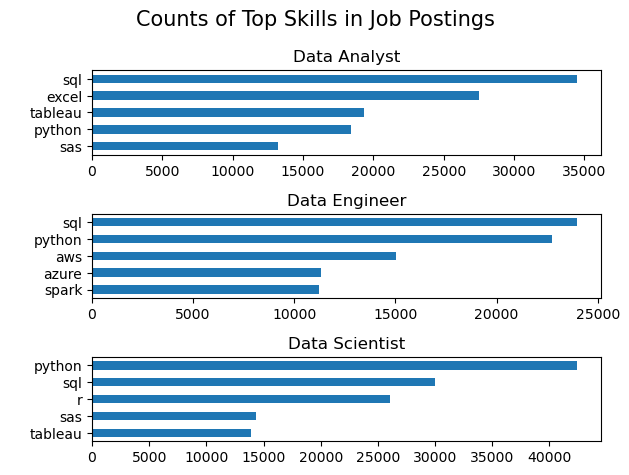

In [15]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel(' ')
    ax[i].legend().set_visible(False)


fig.suptitle('Counts of Top Skills in Job Postings', fontsize= 15)
plt.tight_layout()
plt.show()

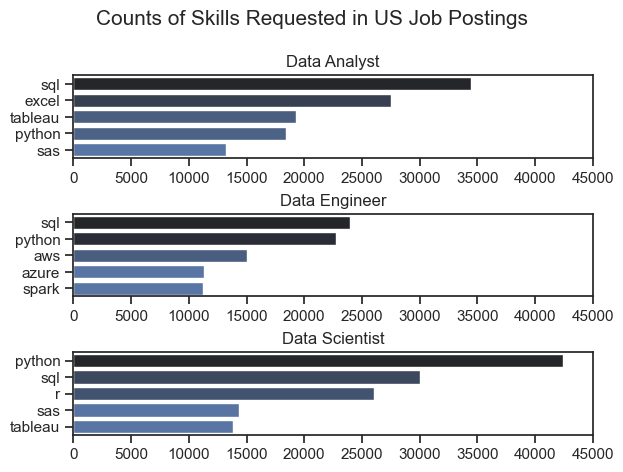

In [20]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000) # make the scales the same

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [21]:
# Use original df to get the count of job titles
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [22]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


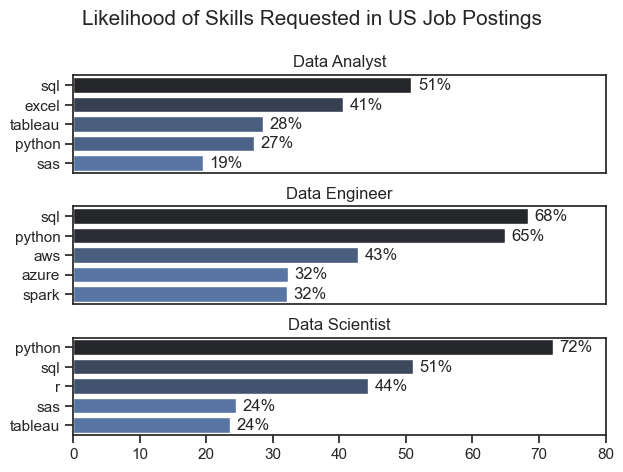

In [31]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 80)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) -1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

In [8]:
df_PL = df[(df['job_country'] == 'Poland')& (df['job_title_short'] == 'Data Analyst')]
df_skills = df_PL.explode('job_skills')

In [9]:
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,sql,"{'analyst_tools': ['excel', 'looker', 'tableau..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,python,"{'analyst_tools': ['excel', 'looker', 'tableau..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,r,"{'analyst_tools': ['excel', 'looker', 'tableau..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,redshift,"{'analyst_tools': ['excel', 'looker', 'tableau..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,pandas,"{'analyst_tools': ['excel', 'looker', 'tableau..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785503,Data Analyst,Associate Director of Analytics,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-17 06:57:42,False,False,Poland,None,NaN,NaN,GSK,azure,"{'analyst_tools': ['power bi', 'dax'], 'cloud'..."
785503,Data Analyst,Associate Director of Analytics,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-17 06:57:42,False,False,Poland,None,NaN,NaN,GSK,databricks,"{'analyst_tools': ['power bi', 'dax'], 'cloud'..."
785503,Data Analyst,Associate Director of Analytics,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-17 06:57:42,False,False,Poland,None,NaN,NaN,GSK,tensorflow,"{'analyst_tools': ['power bi', 'dax'], 'cloud'..."
785503,Data Analyst,Associate Director of Analytics,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-17 06:57:42,False,False,Poland,None,NaN,NaN,GSK,power bi,"{'analyst_tools': ['power bi', 'dax'], 'cloud'..."


In [ ]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().sort_values(ascending=True)
df_skills_count

job_skills  job_title_short
nltk        Data Analyst          1
no-sql      Data Analyst          1
flutter     Data Analyst          1
ggplot2     Data Analyst          1
groovy      Data Analyst          1
                               ... 
power bi    Data Analyst        642
tableau     Data Analyst        687
python      Data Analyst        948
excel       Data Analyst       1188
sql         Data Analyst       1572
Length: 153, dtype: int64

In [ ]:
df_skills_count = df_skills_count.reset_index(name= 'skill_count')

TypeError: DataFrame.reset_index() got an unexpected keyword argument 'name'

In [27]:
df_skills_count

,job_skills,job_title_short,skill_count
0,nltk,Data Analyst,1
1,no-sql,Data Analyst,1
2,flutter,Data Analyst,1
3,ggplot2,Data Analyst,1
4,groovy,Data Analyst,1
...,...,...,...
148,power bi,Data Analyst,642
149,tableau,Data Analyst,687
150,python,Data Analyst,948
151,excel,Data Analyst,1188


Text(0, 0.5, '')

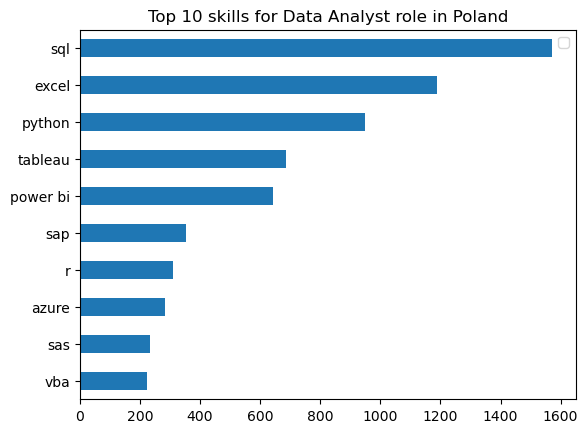

In [ ]:
df_skills_count.tail(10).plot(kind='barh', x='job_skills')

plt.legend('')
plt.title('Top 10 skills for Data Analyst role in Poland')
plt.ylabel('')


In [36]:
df_PL

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
584,Data Analyst,Data Quality Analyst,"Kraków, Poland",via LinkedIn,Full-time,False,Poland,2023-02-16 13:24:23,False,False,Poland,None,NaN,NaN,Dyson,"[sap, excel, word]","{'analyst_tools': ['sap', 'excel', 'word']}"
1263,Data Analyst,Data Analyst - Freelance - Portugal/UK/Poland,Poland,via My Stateline Jobs,Contractor,False,Poland,2023-06-29 14:03:32,True,False,Poland,None,NaN,NaN,Global Enterprise Partners,"[python, sql, r]","{'programming': ['python', 'sql', 'r']}"
1490,Data Analyst,HR Data Analyst,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-12-16 13:11:23,False,False,Poland,year,43200.0,NaN,Westinghouse Electric Company,"[gdpr, sap, powerpoint, excel]","{'analyst_tools': ['sap', 'powerpoint', 'excel..."
2269,Data Analyst,Analityk Danych (Data Analyst),"Warsaw, Poland",via The:Protocol,Full-time,False,Poland,2023-11-23 13:21:09,True,False,Poland,None,NaN,NaN,AASA POLSKA S.A.,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784713,Data Analyst,Data & Analytics Manager,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-04-25 06:23:30,True,False,Poland,None,NaN,NaN,NatWest Polska,[tableau],{'analyst_tools': ['tableau']}
785012,Data Analyst,CRM Data Analyst,Poland,via Adzuna.pl,Full-time,False,Poland,2023-01-14 06:21:29,False,False,Poland,None,NaN,NaN,Nestle,"[sql, sap, power bi, excel]","{'analyst_tools': ['sap', 'power bi', 'excel']..."
785052,Data Analyst,Analityk Big Data,"Kraków, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-17 06:57:43,True,False,Poland,None,NaN,NaN,InPost,"[sql, python, databricks, snowflake, azure, sp...","{'cloud': ['databricks', 'snowflake', 'azure']..."
785474,Data Analyst,Sustainable Sourcing Data Analyst,"Warsaw, Poland",via Linkedin,Full-time,False,Poland,2023-01-04 15:44:44,True,False,Poland,None,NaN,NaN,Mars,"[sap, power bi]","{'analyst_tools': ['sap', 'power bi']}"


In [37]:
df_PL_per = df_skills_count.tail(10)

In [40]:
df_PL_per['total jobs'] = 3172

C:\Users\MateuszSz\AppData\Local\Temp\ipykernel_6124\2521235447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PL_per['total jobs'] = 3172


In [43]:
df_PL_per['percent'] = (df_PL_per['skill_count']/df_PL_per['total jobs']) * 100
df_PL_per

C:\Users\MateuszSz\AppData\Local\Temp\ipykernel_6124\687365576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PL_per['percent'] = (df_PL_per['skill_count']/df_PL_per['total jobs']) * 100


,job_skills,job_title_short,skill_count,total jobs,percent
143,vba,Data Analyst,222,3172,6.998739
144,sas,Data Analyst,234,3172,7.377049
145,azure,Data Analyst,282,3172,8.890290
146,r,Data Analyst,310,3172,9.773014
147,sap,Data Analyst,352,3172,11.097100
148,power bi,Data Analyst,642,3172,20.239596
149,tableau,Data Analyst,687,3172,21.658260
150,python,Data Analyst,948,3172,29.886507
151,excel,Data Analyst,1188,3172,37.452711
152,sql,Data Analyst,1572,3172,49.558638


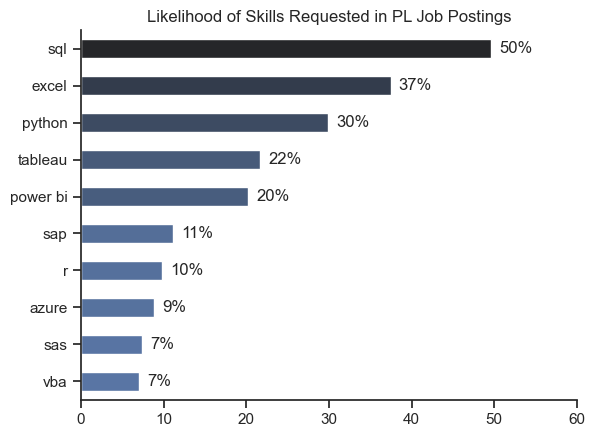

In [71]:
sns.set_theme(style='ticks')

ax = sns.barplot(data=df_PL_per, x='percent', y='job_skills', hue='skill_count', palette='dark:b_r', width=0.5)

ax.set_title('Likelihood of Skills Requested in PL Job Postings')   # Set the title
ax.set_ylabel('')         # Remove y-axis label
ax.set_xlabel('')         # Remove x-axis label
ax.legend_.remove()       # Remove the legend
ax.set_xlim(0, 60)        # Set x-axis limits
ax.invert_yaxis()
sns.despine()


for n, v in enumerate(df_PL_per['percent']):
        ax.text(v + 1, n, f'{v:.0f}%', va='center')

